
***
# <center>R2.07 - Graphes <br>TP4 - Arbres couvrants minimums <center>
***

_Tom Ferragut, Thibault Godin_

_IUT de Vannes, BUT Informatique_

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#magic
import warnings
warnings.filterwarnings('ignore')

## 0 - Introduction
Dans ce TP, tous les graphes sont non-orientés. Nous rappelons ici quelques fonctions utiles.

In [2]:
W=np.array([
 [0     , 2.5   , 1     , np.inf, np.inf, .5    , .5     , 3      ],
 [ 2.5  , 0     , 1.5   , np.inf, 2     , 8     , np.inf ,np.inf  ],
 [  1   , 1.5   , 0     , np.inf, np.inf, np.inf, np.inf ,np.inf  ],
 [np.inf, np.inf, np.inf, 0     ,  1    , np.inf , 5     , np.inf ],
 [np.inf, 2     , np.inf, 1     ,  0    , np.inf, 5      , np.inf ],
 [.5    , 8     , np.inf, np.inf, np.inf, 0     , 1      , 2 ],
 [.5    , np.inf, np.inf, 5     , 5     , 1     , 0      , np.inf ],
 [3     , np.inf, np.inf, np.inf, np.inf, 2     , np.inf ,0       ]])


def ToAdj(W,loop=False):
    """
    Converts a weight matrix to the (most plausible) corresponding adjacency matrix
    
    :param W: Weight matrix 
    :type W: two dimensionnal numpy array
    :return: a adjacency matrix
    :rtype: two dimensionnal numpy array
    
    """
    A=np.copy(W)
    for i in range(A.shape[0]):
        for j in range(A.shape[0]):
            if W[i][j]==np.inf:
                A[i][j]=0
            else :
                if W[i][j]==0:
                    if i!=j:
                        A[i][j]=1
                        print("Warning: a weight is equal to 0")
                    else : 
                        if loop :
                            A[i][j]=1
                        else :
                            A[i][j]=0


                else :
                    A[i][j]=1

    return A

def ToWeight(A):
    """
    Converts an  adjacency matrix to the corresponding weight matrix
    
    :param A: adjacency matrix
    :type A: two dimensionnal numpy array
    :return:  weight matrix 
    :rtype: two dimensionnal numpy array
    
    """
    n=A.shape[0]
    W=np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            if A[i][j]==0:
                W[i][j]=np.inf
            else :
                W[i][j]=1

    return W

print(W)
A=ToAdj(W)

print(A)



[[0.  2.5 1.  inf inf 0.5 0.5 3. ]
 [2.5 0.  1.5 inf 2.  8.  inf inf]
 [1.  1.5 0.  inf inf inf inf inf]
 [inf inf inf 0.  1.  inf 5.  inf]
 [inf 2.  inf 1.  0.  inf 5.  inf]
 [0.5 8.  inf inf inf 0.  1.  2. ]
 [0.5 inf inf 5.  5.  1.  0.  inf]
 [3.  inf inf inf inf 2.  inf 0. ]]
[[0. 1. 1. 0. 0. 1. 1. 1.]
 [1. 0. 1. 0. 1. 1. 0. 0.]
 [1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 0. 1. 0.]
 [1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 0. 0. 1. 1. 1. 0. 0.]
 [1. 0. 0. 0. 0. 1. 0. 0.]]


(Weighted)Graph drawing

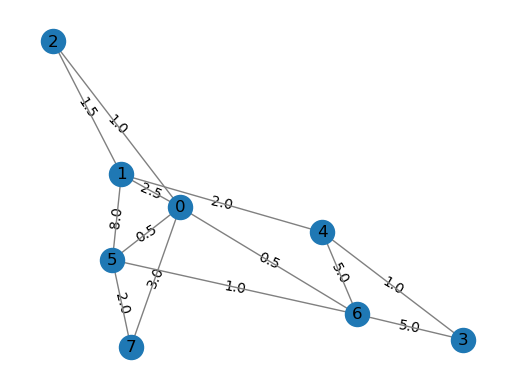

In [3]:
G=nx.from_numpy_array(A)



edges = G.edges()



for u,v in G.edges():
    G[u][v]['weight'] = W[u][v]

# Visualization with edge weights
weights = nx.get_edge_attributes(G, 'weight')
pos=nx.spring_layout(G)

# Visualization with edge widths equal to edge weights
#width = [weights[e] for e in G.edges()]
nx.draw_networkx_edge_labels(G, pos, edge_labels = weights)
nx.draw(G, pos, edge_color = 'grey',with_labels=True)


## 1 - Algorithme de Kruskal


> <font color=darkorange> **_Question 1 :_** </font>
> 
> Écrire une fonction `weightToList` prenant en entrée la matrice des poids d'un graphe et renvoyant la liste des arêtes triée par ordre de poids.

[[0.5, 0, 5], [0.5, 0, 6], [1.0, 0, 2], [1.0, 3, 4], [1.0, 5, 6], [1.5, 1, 2], [2.0, 1, 4], [2.0, 5, 7], [2.5, 0, 1], [3.0, 0, 7], [5.0, 3, 6], [5.0, 4, 6], [8.0, 1, 5]]
[[0. 0. 1. 0. 0. 1. 1. 0.]
 [0. 0. 1. 0. 1. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]]


array([[0. , 0. , 1. , 0. , 0. , 0.5, 0.5, 0. ],
       [0. , 0. , 1.5, 0. , 2. , 0. , 0. , 0. ],
       [1. , 1.5, 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 1. , 0. , 0. , 0. ],
       [0. , 2. , 0. , 1. , 0. , 0. , 0. , 0. ],
       [0.5, 0. , 0. , 0. , 0. , 0. , 0. , 2. ],
       [0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 2. , 0. , 0. ]])

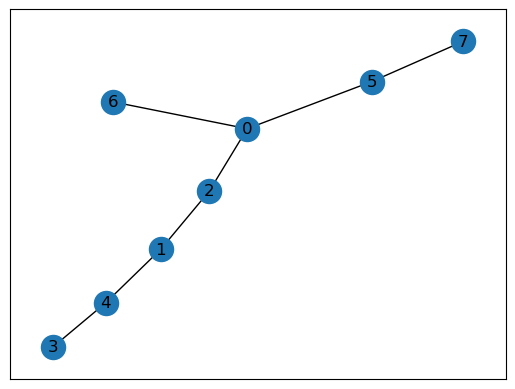

In [4]:


def weightToList(W):
    """
     Return the list of edges sorted by weight

    :param W: the weight matrix
    :type W: a two dimensional square numpy array 
    :return:  the list of edges sorted by weight
    :rtype:  list
    """
            
    L=[]
    
    for i in range(W.shape[0]):
        
        for j in range(i+1,W.shape[0]):    
            if not(W[i][j]==np.inf):
                L.append([W[i][j],i,j])
    L.sort()
    
    return L



Une manière pratique de savoir si l’ajout d’une arête crée un cycle consiste à créer et à mettre à jour un tableau de composantes connexes. Concrètement, on commence avec tous les sommets n’appartenant à aucune composante connexe (représentés par $-1$), puis on met à jour les composantes connexes en suivant les règles suivantes :

   - Si on ajoute deux sommets qui ne sont encore dans aucune composante connexe, on les assigne à une nouvelle composante.

   - Si l’un des deux appartient déjà à une composante connexe $C$, alors on ajoute l’autre sommet à $C$.

   - Si les deux appartiennent à des composantes différentes $C$ et $C'$, alors on place tous les sommets de $C'$ dans $C$.

   - Si les deux appartiennent à la même composante $C$, alors l’arête créerait un cycle et ne devrait donc pas être ajoutée.

> <font color=darkorange> **_Question 2 :_** </font>
> 
> Écrire une fonction `Kruskal` prenant en entrée une matrice de valuation d'un graphe, en renvoyant la matrice d'adjacence ainsi que la matrice de valuation de l'arbre couvrant minimum obtenu grâce à l'algorithme de Kruskal.

In [ ]:


def Kruskal(W):
    """
     Return the MST (adjacency and weight matrices) given a weight matrix

    :param W: the weight matrix
    :type W: a two dimensional square numpy array 
    :return T:  the adjacency and weight matrix of the MST
    :rtype: 2  two dimensional square numpy arrays
    """
                
    T=np.zeros((W.shape[0],W.shape[0]))
    WT=np.ones((W.shape[0],W.shape[0]))*0 #0 to be able to draw

    L=weightToList(W)
    #list of connected composants (negative :has not been used yet)
    cc=[-i for  i in range(1,W.shape[0]+1)]
    
    
    cc_count=0
    while len(set(cc))>1:
        edge=L[0]
       
        i=edge[1]
        j=edge[2]
        if cc[i] < 0 and cc[j] <0 : #new CC
            cc[i]=cc_count
            cc[j]=cc_count
            cc_count=cc_count+1
            WT[i][j]=W[i][j]
            WT[j][i]=W[j][i]
            T[i][j]=1
            T[j][i]=1
        else:
            if cc[i] != cc[j]: #different CC
                cc1=cc[i]
                cc2=cc[j]
                cc_new=max(cc1,cc2) 
                for k in range(len(cc)):
                    if (cc[k]==cc1 or cc[k]==cc2):
                        cc[k]=cc_new
                WT[i][j]=W[i][j]
                WT[j][i]=W[j][i]
                T[i][j]=1
                T[j][i]=1   
        L=L[1:]

    return T,WT

[[0,-1],[1,-1],[2,-1]] 
[[0,0],[1,0],[2,0]]                        


W=np.array([
 [0     , 2.5   , 1     , np.inf, np.inf, .5    , .5     , 3      ],
 [ 2.5  , 0     , 1.5   , np.inf, 2     , 8     , np.inf ,np.inf  ],
 [  1   , 1.5   , 0     , np.inf, np.inf, np.inf, np.inf ,np.inf  ],
 [np.inf, np.inf, np.inf, 0     ,  1    , np.inf , 5     , np.inf ],
 [np.inf, 2     , np.inf, 1     ,  0    , np.inf, 5      , np.inf ],
 [.5    , 8     , np.inf, np.inf, np.inf, 0     , 1      , 2 ],
 [.5    , np.inf, np.inf, 5     , 5     , 1     , 0      , np.inf ],
 [3     , np.inf, np.inf, np.inf, np.inf, 2     , np.inf ,0       ]])


A=ToAdj(W)

print(weightToList(W))
T,WT=Kruskal(W)
print(T)
nx.draw_networkx(nx.from_numpy_array(T))
    
WT

[[0. 1. 1. 0. 0. 1. 1. 1.]
 [1. 0. 1. 0. 1. 1. 0. 0.]
 [1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 0. 1. 0.]
 [1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 0. 0. 1. 1. 1. 0. 0.]
 [1. 0. 0. 0. 0. 1. 0. 0.]] [[0. 0. 1. 0. 0. 1. 1. 0.]
 [0. 0. 1. 0. 1. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]] [[0.  0.  1.  0.  0.  0.5 0.5 0. ]
 [0.  0.  1.5 0.  2.  0.  0.  0. ]
 [1.  1.5 0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  1.  0.  0.  0. ]
 [0.  2.  0.  1.  0.  0.  0.  0. ]
 [0.5 0.  0.  0.  0.  0.  0.  2. ]
 [0.5 0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  2.  0.  0. ]]
[0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0] [1.0, 2.0, 1.5, 1.5, 1.0, 2.5, 3.0, 1.0, 2.0, 1.0, 1.0, 1.0, 3.0]


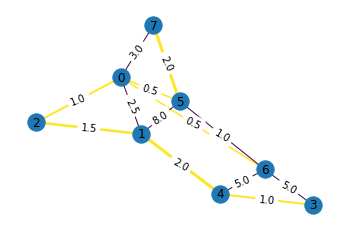

In [5]:
G=nx.from_numpy_array(A)

T,WT=Kruskal(W)


print(A,T,WT)
edges = G.edges()
#À quoi ressemble edges ? (type, forme ...) 
#Il pourra être utile de convertir edges en np.array en écrivant
#edges=np.array(G.edges)

for u,v in G.edges():
    G[u][v]['weight'] = W[u][v]


colors=[T[u[0]][u[1]] for u in edges]
width=[1+WT[u[0]][u[1]] for u in edges]
#Que fait-on ici ?

print(colors,width)
nx.draw_networkx_edge_labels(G, pos, edge_labels = weights)
nx.draw(G, pos=pos,edge_color=colors,width=width,with_labels=True)

## 2 - Algorithme de Prim

> <font color=darkorange> **_Question 3 :_** </font>
> 
> Écrire une fonction `outEdges` prenant en entrée la matrice des poids d'un graphe ainsi qu'un sous-ensemble de ses sommets `nodes`, et qui renvoie la liste des arêtes ayant une seule extremité connectée à l'un des sommets de `nodes`.


In [6]:
def outEdges(W,nodes):
    """
     Return the list of edges which have exactly one end in nodes, sorted by weight

    :param W: the weight matrix
    :type W: a two dimensional square numpy array
    :param nodes: a set of nodes
    :type nodes: set or array     
    :return:  list of edges which have exactly one end in nodes, sorted by weight
    :rtype:  list
    """    
    edges=[]
    for i in nodes :
        for j in range(W.shape[0]):
            if not(j in nodes) and not(W[i][j]==np.inf):
                edges.append([W[i][j],i,j])
                
    edges.sort(reverse=True)
    return edges

print(outEdges(W,{0}))



[[3.0, 0, 7], [2.5, 0, 1], [1.0, 0, 2], [0.5, 0, 6], [0.5, 0, 5]]


(array([[0., 0., 1., 0., 0., 1., 1., 0.],
        [0., 0., 1., 0., 1., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 1., 0., 1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0.]]),
 array([[0. , 0. , 1. , 0. , 0. , 0.5, 0.5, 0. ],
        [0. , 0. , 1.5, 0. , 2. , 0. , 0. , 0. ],
        [1. , 1.5, 0. , 0. , 0. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. , 1. , 0. , 0. , 0. ],
        [0. , 2. , 0. , 1. , 0. , 0. , 0. , 0. ],
        [0.5, 0. , 0. , 0. , 0. , 0. , 0. , 2. ],
        [0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. , 0. , 2. , 0. , 0. ]]))

> <font color=darkorange> **_Question 4 :_** </font>
> 
> Écrire une fonction `Prim` prenant en entrée une matrice de valuation d'un graphe, en renvoyant la matrice d'adjacence ainsi que la matrice de valuation de l'arbre couvrant minimum obtenu grâce à l'algorithme de Prim.

In [ ]:
def Prim(W,initial=0):

    """
     Return the MST (adjacency and weight matrices) given a weight matrix

    :param W: the weight matrix
    :type W: a two dimensional square numpy array 
    :return T:  the adjacency and weight matrix of the MST
    :rtype: 2  two dimensional square numpy arrays
    """

    T=np.zeros((W.shape[0],W.shape[0]))
    WT=np.zeros((W.shape[0],W.shape[0]))

    nodes={initial}
    
    
    
    for k in range(W.shape[0]-1):
            edge=outEdges(W,nodes).pop()
            i=edge[1]
            j=edge[2]            
            T[i][j]=1
            T[j][i]=1
            WT[i][j]=W[i][j]
            WT[j][i]=W[j][i]
            nodes.add(i)
            nodes.add(j)
    return T,WT 
    
Prim(W)

[[0. 1. 1. 0. 0. 1. 1. 1.]
 [1. 0. 1. 0. 1. 1. 0. 0.]
 [1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 0. 1. 0.]
 [1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 0. 0. 1. 1. 1. 0. 0.]
 [1. 0. 0. 0. 0. 1. 0. 0.]] [[0. 0. 1. 0. 0. 1. 1. 0.]
 [0. 0. 1. 0. 1. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]] [[0.  0.  1.  0.  0.  0.5 0.5 0. ]
 [0.  0.  1.5 0.  2.  0.  0.  0. ]
 [1.  1.5 0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  1.  0.  0.  0. ]
 [0.  2.  0.  1.  0.  0.  0.  0. ]
 [0.5 0.  0.  0.  0.  0.  0.  2. ]
 [0.5 0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  2.  0.  0. ]]
[0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0] [1.0, 2.0, 1.5, 1.5, 1.0, 2.5, 3.0, 1.0, 2.0, 1.0, 1.0, 1.0, 3.0]


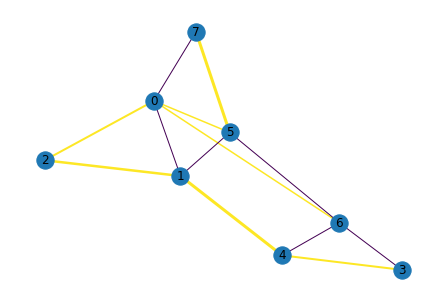

In [7]:
G=nx.from_numpy_array(A)

T,WT=Prim(W)


print(A,T,WT)
edges = G.edges()
#À quoi ressemble edges ? (type, forme ...) 
#Il pourra être utile de convertir edges en np.array en écrivant
#edges=np.array(G.edges)



colors=[T[u[0]][u[1]] for u in edges]
width=[1+WT[u[0]][u[1]] for u in edges]
#Que fait-on ici ?

print(colors,width)
nx.draw(G, pos=pos,edge_color=colors,width=width,with_labels=True)

#